In [9]:
!pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from io import StringIO
from bertopic import BERTopic

In [11]:
df = pd.read_csv("/kaggle/input/sarcasm/train-balanced-sarcasm.csv")
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [12]:
import random

random_seed = 42
random.seed(random_seed)

if "comment" in df.columns:
    comments = df["comment"].astype(str).tolist()
    sample_size = int(len(comments) * 0.02)
    sampled_comments = random.sample(comments, sample_size)
    df_sample = pd.DataFrame(sampled_comments, columns=["comment"])
else:
    print("The 'comment' column was not found in the DataFrame.")

df = df_sample.copy()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

if "comment" in df.columns:
    comments = df["comment"].astype(str).tolist()
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(comments)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    for i in range(5):
        similar_indices = similarity_matrix[i].argsort()[::-1][1:6]
        print(f"\nYorum {i+1}: {comments[i][:100]}...")
        print("En benzer yorumlar:")
        for idx in similar_indices:
            print(f"- {comments[idx][:100]}...")
else:
    print("DataFrame'de 'comment' sütunu bulunamadı.")


Yorum 1: As if there were any decent politicians to actually vote for....
En benzer yorumlar:
- Vote...
- Your vote actually matters....
- That would imply that politicians actually do work....
- Just vote again!...
- 3 is the only one with a decent ass....

Yorum 2: Fuckin Euronoobs....
En benzer yorumlar:
- Fuckin' Commie...
- Fuckin' scrub....
- So fuckin savage...
- You're a fuckin' asshole dude....
- fuckin weebs....

Yorum 3: I can't think of any other reason one would voluntarily install this extension....
En benzer yorumlar:
- I think I'll just install xonotic again....
- Install gentoo...
- I think most people would argue that you should be more concerned about the safety of others around ...
- But think of what he MIGHT have done....
- I think it was...

Yorum 4: Duh, all MOBA's are TDM, there's *OBVIOUSLY* no objectives to take or anything...
En benzer yorumlar:
- duh, how else will he get better?...
- Obviously....
- Obviously...
- Obviously...
- *obviously*...

Yorum 5: T

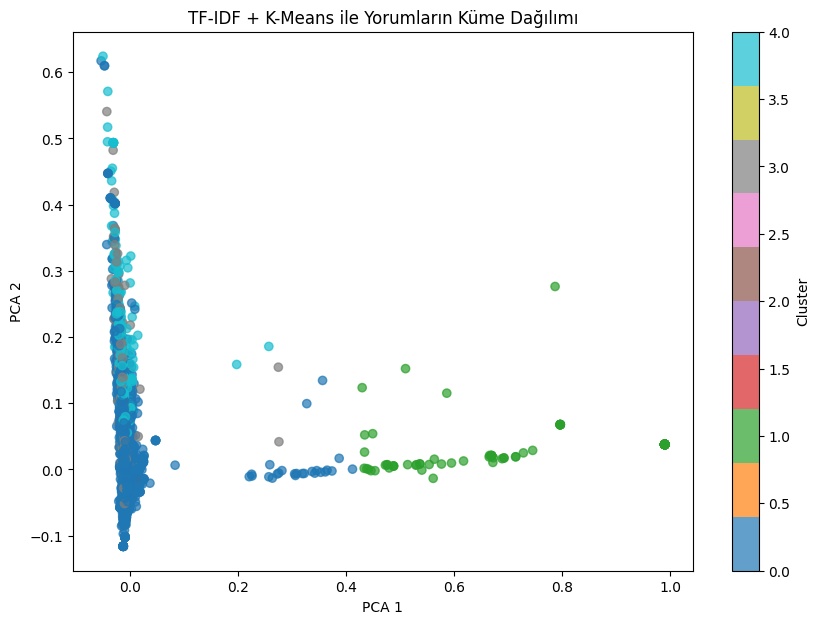

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

if "comment" in df.columns:
    comments = df["comment"].astype(str).tolist()
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(comments)
    
    n_clusters = 5
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(tfidf_matrix)
    
    pca = PCA(n_components=2, random_state=42)
    reduced = pca.fit_transform(tfidf_matrix.toarray())
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', alpha=0.7)
    plt.title("TF-IDF + K-Means ile Yorumların Küme Dağılımı")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(scatter, label="Cluster")
    plt.show()
else:
    print("DataFrame'de 'comment' sütunu bulunamadı.")

In [15]:
# BERTopic ile yorumlarda konu modelleme ve görselleştirme

if "comment" in df.columns:
    comments = df["comment"].astype(str).tolist()
    # BERTopic modelini oluştur ve eğit
    topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
    topics, probs = topic_model.fit_transform(comments)
    
    # Konu dağılımı için scatter plot çiz
    topic_model.visualize_documents(comments)
else:
    print("The 'comment' column was not found in the DataFrame.")

2025-07-03 11:46:22,345 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/632 [00:00<?, ?it/s]

2025-07-03 11:46:28,903 - BERTopic - Embedding - Completed ✓
2025-07-03 11:46:28,904 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-03 11:46:37,257 - BERTopic - Dimensionality - Completed ✓
2025-07-03 11:46:37,259 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-03 11:47:36,065 - BERTopic - Cluster - Completed ✓
2025-07-03 11:47:36,073 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-03 11:47:36,585 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/632 [00:00<?, ?it/s]

In [19]:
# Her bir konuya ait özet bilgiler
topic_info = topic_model.get_topic_info()
print(topic_info.head(5))  # İlk 10 konuyu göster

   Topic  Count                           Name  \
0     -1  10210               -1_the_to_it_and   
1      0    382  0_obama_vote_trump_republican   
2      1    303             1_she_her_shes_was   
3      2    261       2_deck_damage_cards_nerf   
4      3    256    3_racist_white_black_racism   

                                      Representation  \
0      [the, to, it, and, he, you, of, that, in, be]   
1  [obama, vote, trump, republican, hillary, bern...   
2  [she, her, shes, was, herself, tone, woman, be...   
3  [deck, damage, cards, nerf, mana, buff, card, ...   
4  [racist, white, black, racism, people, racists...   

                                 Representative_Docs  
0  [but it was!, now you know what to do with the...  
1  [How do you not know who Obama?, But they were...  
2  [She says she calls them before she comes, I g...  
3  [A 1 Mana 1/2 with Spell Damage is never going...  
4  [Only black people can be this racist., Becaus...  


In [20]:
# Örneğin, 0 numaralı konunun anahtar kelimeleri
print(topic_model.get_topic(0))

[('obama', 0.023521418575528093), ('vote', 0.019972817811592297), ('trump', 0.017618451248433767), ('republican', 0.014405331194769552), ('hillary', 0.013318042659389843), ('bernie', 0.01310317929732137), ('clinton', 0.01310317929732137), ('voting', 0.010692516869617115), ('sanders', 0.010014271597081665), ('candidate', 0.009733357159999633)]


In [25]:
topic_model.visualize_barchart(top_n_topics=10)  # En büyük 10 konuyu çubuk grafikte göster

In [22]:
topic_model.visualize_topics()  # Küme yapısını gösteren interaktif 2D harita

In [23]:
topic_model.visualize_hierarchy()
